In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef, roc_auc_score

# Load the dataset
df = pd.read_csv("/content/sample_data/HemB_Dataset_v5a.csv", delimiter='\t')


df = df[['cDNA', 'AA_HGVS', 'AA_Legacy', 'Domain', 'Protein_Change', 'aa1', 'aa2', 'AA_dist', 'psi', 'phi', 'areaSAS', 'areaSES', 'relSESA', 'kdHydrophobicity', 'consurfDB', 'degree', 'betweenness', 'closeness', 'burts', 'pr', 'auth', 'kcore', 'SIFT_score', 'Provean_score_2.5', 'Provean_score_0.05', 'Polyphen2_pph2_prob', 'Polyphen2_dScore', 'Polyphen2_Score1', 'Polyphen2_Score2', 'Polyphen2_MinDJxn', 'Polyphen2_IdPmax', 'Polyphen2_IdQmin', 'Reported_Severity']]


df.to_csv("/content/selected_dataset.csv", index=False)

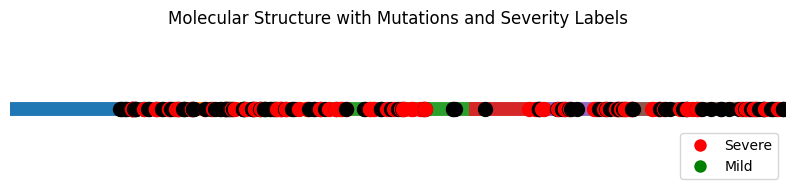

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/selected_dataset.csv")

# Define severity colors
severity_colors = {
    'Severe': 'red',

    'Mild': 'green'
}

# Define protein domains and their positions
domains = {
    'Gla': (0, 200),
    'EGF1': (201, 400),
    'EGF2': (401, 600),
    'Linker': (601, 700),
    'Act-Peptide': (701, 800),
    'Serine Protease': (801, 1000)
}

# Plot the protein structure with mutations
fig, ax = plt.subplots(figsize=(10, 2))

# Plot domains
for domain, (start, end) in domains.items():
    ax.plot([start, end], [0, 0], lw=10, label=domain)

# Plot mutations
for index, row in data.iterrows():
    position = row['cDNA']
    severity = row['Reported_Severity']
    color = severity_colors.get(severity, 'black')
    ax.scatter(position, 0, color=color, s=100, zorder=5)

# Create legend for severity labels
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=severity)
                  for severity, color in severity_colors.items()]
ax.legend(handles=legend_handles, loc='lower right')

# Set axis limits and hide ticks
ax.set_xlim(0, 1000)
ax.set_ylim(-0.5, 0.5)
ax.axis('off')

plt.title('Molecular Structure with Mutations and Severity Labels')
plt.show()


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        44
           1       0.67      0.67      0.67        27

    accuracy                           0.75        71
   macro avg       0.73      0.73      0.73        71
weighted avg       0.75      0.75      0.75        71

Accuracy: 0.7464788732394366

Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.74      0.73      0.74        44
           1       0.57      0.59      0.58        27

    accuracy                           0.68        71
   macro avg       0.66      0.66      0.66        71
weighted avg       0.68      0.68      0.68        71

Accuracy: 0.676056338028169

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        44
           1       0.69      0.67      0.68        27

    accuracy                           0.76    

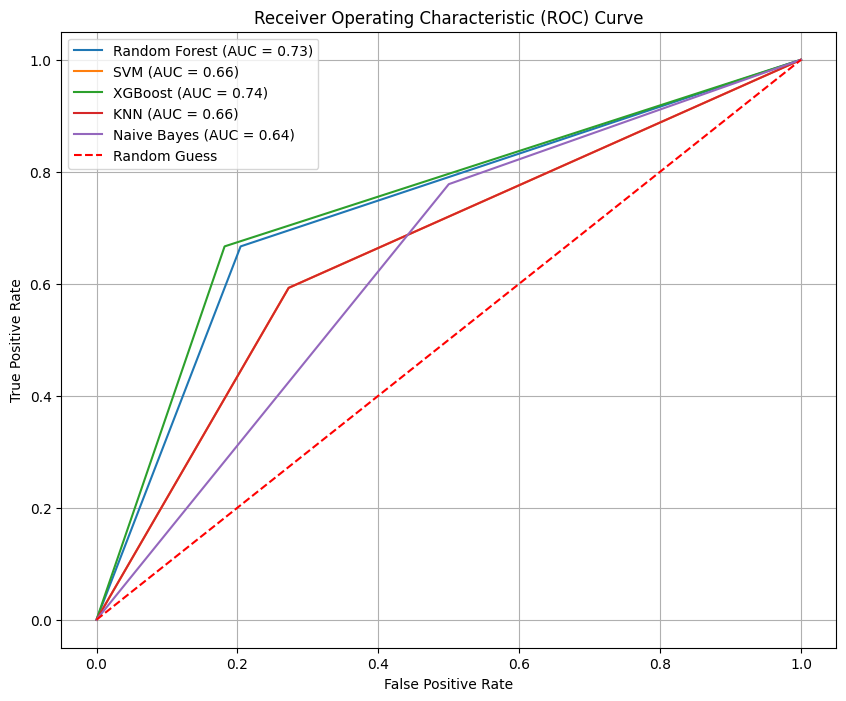

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



df = pd.read_csv("/content/selected_dataset.csv")
df = pd.get_dummies(df, columns=['Domain', 'Protein_Change'])

# Convert target labels
df['Reported_Severity'] = df['Reported_Severity'].map({'Others': 0, 'Severe': 1})

# Select numeric columns
non_numeric_columns = ['cDNA', 'AA_HGVS', 'AA_Legacy', 'Reported_Severity']
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col not in non_numeric_columns]

# Remove non-numeric values from numeric columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaN

# Drop rows with NaN values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_columns])
y = df['Reported_Severity']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# 3. Model Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# 4. Model Training
# Train the models
rf_model = RandomForestClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# 5. Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the models using appropriate metrics
rf_y_pred = rf_model.predict(X_test)
svm_y_pred = svm_model.predict(X_test)
xgb_y_pred = xgb_model.predict(X_test)
knn_y_pred = knn_model.predict(X_test)
nb_y_pred = nb_model.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test, rf_y_pred))
print("Accuracy:", accuracy_score(y_test, rf_y_pred))

print("\nSupport Vector Machine (SVM):")
print(classification_report(y_test, svm_y_pred))
print("Accuracy:", accuracy_score(y_test, svm_y_pred))

print("\nXGBoost Classifier:")
print(classification_report(y_test, xgb_y_pred))
print("Accuracy:", accuracy_score(y_test, xgb_y_pred))

print("\nK-Nearest Neighbors (KNN) Classifier:")
print(classification_report(y_test, knn_y_pred))
print("Accuracy:", accuracy_score(y_test, knn_y_pred))

print("\nNaive Bayes Classifier:")
print(classification_report(y_test, nb_y_pred))
print("Accuracy:", accuracy_score(y_test, nb_y_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define a function to evaluate the model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

# Evaluate each model
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc = evaluate_model(y_test, rf_y_pred)
svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc = evaluate_model(y_test, svm_y_pred)
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, xgb_roc_auc = evaluate_model(y_test, xgb_y_pred)
knn_accuracy, knn_precision, knn_recall, knn_f1, knn_roc_auc = evaluate_model(y_test, knn_y_pred)
nb_accuracy, nb_precision, nb_recall, nb_f1, nb_roc_auc = evaluate_model(y_test, nb_y_pred)

# Print the evaluation results
print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-score: {rf_f1}")
print(f"ROC AUC: {rf_roc_auc}")
print()

print("Support Vector Machine (SVM):")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1-score: {svm_f1}")
print(f"ROC AUC: {svm_roc_auc}")
print()

print("XGBoost Classifier:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1-score: {xgb_f1}")
print(f"ROC AUC: {xgb_roc_auc}")
print()

print("K-Nearest Neighbors (KNN) Classifier:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1-score: {knn_f1}")
print(f"ROC AUC: {knn_roc_auc}")
print()

print("Naive Bayes Classifier:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1-score: {nb_f1}")
print(f"ROC AUC: {nb_roc_auc}")

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))

# Random Forest
fpr, tpr, _ = roc_curve(y_test, rf_y_pred)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')

# SVM
fpr, tpr, _ = roc_curve(y_test, svm_y_pred)
plt.plot(fpr, tpr, label=f'SVM (AUC = {svm_roc_auc:.2f})')

# XGBoost
fpr, tpr, _ = roc_curve(y_test, xgb_y_pred)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})')

# KNN
fpr, tpr, _ = roc_curve(y_test, knn_y_pred)
plt.plot(fpr, tpr, label=f'KNN (AUC = {knn_roc_auc:.2f})')

# Naive Bayes
fpr, tpr, _ = roc_curve(y_test, nb_y_pred)
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {nb_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()



In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv("/content/selected_dataset.csv")

# Data preprocessing
# Handle missing values
#df.fillna(df.mean(), inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Domain', 'Protein_Change'])

# Convert target labels
df['Reported_Severity'] = df['Reported_Severity'].map({'Others': 0, 'Severe': 1})

# Select numeric columns
non_numeric_columns = ['cDNA', 'AA_HGVS', 'AA_Legacy', 'Reported_Severity']
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col not in non_numeric_columns]

# Remove non-numeric values from numeric columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaN

# Drop rows with NaN values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_columns])
y = df['Reported_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
rf_model = RandomForestClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)
svm_y_pred = svm_model.predict(X_test)
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_y_pred)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

# Print the accuracies
print("Random Forest Classifier - Accuracy:", rf_accuracy)
print("Support Vector Machine (SVM) - Accuracy:", svm_accuracy)
print("XGBoost Classifier - Accuracy:", xgb_accuracy)


Random Forest Classifier - Accuracy: 0.7464788732394366
Support Vector Machine (SVM) - Accuracy: 0.676056338028169
XGBoost Classifier - Accuracy: 0.7605633802816901


In [5]:
!pip install genetic_algorithm

  Preparing metadata (setup.py) ... done
  Created wheel for genetic_algorithm: filename=genetic_algorithm-1.0.0-py3-none-any.whl size=7616 sha256=54344e8f4410169702cc449dfba199ebbb34763cda4189c90f10fe370ee23b46
  Stored in directory: /root/.cache/pip/wheels/4c/2c/bf/9c1f04950777c3f6a9d18237af6a2d3b7679aec18ff6a3b6be
Successfully built genetic_algorithm


In [6]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:00


SVM classifier

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Load your dataset
df = pd.read_csv("/content/selected_dataset.csv")

df = pd.get_dummies(df, columns=['Domain', 'Protein_Change'])

# Convert target labels
df['Reported_Severity'] = df['Reported_Severity'].map({'Others': 0, 'Severe': 1})

# Select numeric columns
non_numeric_columns = ['cDNA', 'AA_HGVS', 'AA_Legacy', 'Reported_Severity']
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col not in non_numeric_columns]

# Remove non-numeric values from numeric columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaN

# Drop rows with NaN values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_columns])
y = df['Reported_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Genetic Algorithm Parameters
population_size = 10
num_generations = 50
mutation_rate = 0.1

# Objective Function (Fitness function): SVM Classifier Accuracy
def fitness_function(features):
    selected_features = np.array(features, dtype=bool)
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Train an SVM classifier
    clf = SVC()
    clf.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_selected)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

# Create a FitnessMax class for maximizing accuracy
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# Create an Individual class representing a solution (list of binary features)
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create a Toolbox for evolution
toolbox = base.Toolbox()

# Register functions to create and manipulate individuals
toolbox.register("attr_bool", np.random.choice, [False, True])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(numeric_columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register the fitness function
toolbox.register("evaluate", fitness_function)

# Register genetic operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=mutation_rate)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm
def genetic_algorithm():
    pop = toolbox.population(n=population_size)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=num_generations, stats=stats, halloffame=hof, verbose=True)

    best_solution = hof[0]
    best_fitness = best_solution.fitness.values[0]
    return best_solution, best_fitness

# Run the Genetic Algorithm
best_solution, best_fitness = genetic_algorithm()

print("\nFinal Result:")
print("Best Features:", best_solution)
print("Best Fitness (Accuracy):", best_fitness)


gen	nevals	avg     	min     	max     
0  	10    	0.676056	0.619718	0.732394
1  	7     	0.712676	0.690141	0.746479
2  	8     	0.704225	0.676056	0.746479
3  	4     	0.721127	0.704225	0.746479
4  	6     	0.732394	0.704225	0.746479
5  	8     	0.730986	0.647887	0.746479
6  	4     	0.738028	0.690141	0.746479
7  	7     	0.74507 	0.732394	0.746479
8  	5     	0.746479	0.746479	0.746479
9  	5     	0.739437	0.676056	0.746479
10 	5     	0.733803	0.647887	0.746479
11 	9     	0.728169	0.633803	0.746479
12 	6     	0.733803	0.690141	0.746479
13 	4     	0.746479	0.746479	0.746479
14 	8     	0.746479	0.746479	0.746479
15 	6     	0.728169	0.690141	0.746479
16 	5     	0.729577	0.633803	0.746479
17 	7     	0.739437	0.676056	0.746479
18 	9     	0.743662	0.71831 	0.746479
19 	5     	0.746479	0.746479	0.746479
20 	3     	0.746479	0.746479	0.746479
21 	5     	0.743662	0.71831 	0.746479
22 	2     	0.740845	0.690141	0.746479
23 	7     	0.739437	0.704225	0.746479
24 	4     	0.738028	0.676056	0.746479
25 	2     	0

random forest classifier

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Load your dataset
df = pd.read_csv("/content/selected_dataset.csv")

# Data preprocessing
df = pd.get_dummies(df, columns=['Domain', 'Protein_Change'])

# Convert target labels
df['Reported_Severity'] = df['Reported_Severity'].map({'Others': 0, 'Severe': 1})

# Select numeric columns
non_numeric_columns = ['cDNA', 'AA_HGVS', 'AA_Legacy', 'Reported_Severity']
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col not in non_numeric_columns]

# Remove non-numeric values from numeric columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaN

# Drop rows with NaN values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_columns])
y = df['Reported_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Genetic Algorithm Parameters
population_size = 10
num_generations = 50
mutation_rate = 0.1

# Define fitness function for classifier accuracy
def fitness_function(features):
    selected_features = np.array(features, dtype=bool)
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Train a Random Forest classifier
    clf = RandomForestClassifier()
    clf.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_selected)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

# Create a FitnessMax class for maximizing accuracy
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# Create an Individual class representing a solution (list of binary features)
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create a Toolbox for evolution
toolbox = base.Toolbox()

# Register functions to create and manipulate individuals
toolbox.register("attr_bool", np.random.choice, [False, True])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(numeric_columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register the fitness function
toolbox.register("evaluate", fitness_function)

# Register genetic operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=mutation_rate)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm
def genetic_algorithm():
    pop = toolbox.population(n=population_size)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=num_generations, stats=stats, halloffame=hof, verbose=True)

    best_solution = hof[0]
    best_fitness = best_solution.fitness.values[0]
    return best_solution, best_fitness

# Run the Genetic Algorithm
best_solution, best_fitness = genetic_algorithm()

print("\nFinal Result:")
print("Best Features:", best_solution)
print("Best Fitness (Accuracy):", best_fitness)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	min     	max     
0  	10    	0.704225	0.661972	0.760563
1  	4     	0.725352	0.690141	0.760563
2  	8     	0.721127	0.676056	0.760563
3  	8     	0.725352	0.704225	0.760563
4  	7     	0.726761	0.704225	0.760563
5  	10    	0.729577	0.676056	0.760563
6  	7     	0.738028	0.690141	0.760563
7  	4     	0.743662	0.690141	0.760563
8  	9     	0.735211	0.71831 	0.760563
9  	9     	0.730986	0.676056	0.774648
10 	3     	0.742254	0.704225	0.774648
11 	5     	0.746479	0.690141	0.774648
12 	6     	0.735211	0.704225	0.774648
13 	7     	0.74507 	0.704225	0.774648
14 	6     	0.743662	0.704225	0.774648
15 	6     	0.759155	0.71831 	0.788732
16 	1     	0.767606	0.732394	0.788732
17 	6     	0.747887	0.690141	0.788732
18 	6     	0.750704	0.71831 	0.788732
19 	3     	0.753521	0.732394	0.788732
20 	4     	0.757746	0.732394	0.788732
21 	6     	0.743662	0.704225	0.774648
22 	7     	0.730986	0.704225	0.774648
23 	9     	0.730986	0.690141	0.774648
24 	2     	0.766197	0.732394	0.802817
25 	5     	0

Random forest, XGBoost, KNN, and Naive Bayes

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Load your dataset
df = pd.read_csv("/content/selected_dataset.csv")

df = pd.get_dummies(df, columns=['Domain', 'Protein_Change'])

# Convert target labels
df['Reported_Severity'] = df['Reported_Severity'].map({'Others': 0, 'Severe': 1})

# Select numeric columns
non_numeric_columns = ['cDNA', 'AA_HGVS', 'AA_Legacy', 'Reported_Severity']
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col not in non_numeric_columns]

# Remove non-numeric values from numeric columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaN

# Drop rows with NaN values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_columns])
y = df['Reported_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Genetic Algorithm Parameters
population_size = 10
num_generations = 50
mutation_rate = 0.1

# Define fitness function for classifier accuracy
def fitness_function(features, classifier):
    selected_features = np.array(features, dtype=bool)
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Initialize the classifier
    if classifier == 'random_forest':
        clf = RandomForestClassifier()
    elif classifier == 'xgboost':
        clf = XGBClassifier()
    elif classifier == 'knn':
        clf = KNeighborsClassifier()
    elif classifier == 'naive_bayes':
        clf = GaussianNB()
    else:
        raise ValueError("Invalid classifier provided.")

    # Train the classifier
    clf.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_selected)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

# Create a FitnessMax class for maximizing accuracy
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# Create an Individual class representing a solution (list of binary features)
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create a Toolbox for evolution
toolbox = base.Toolbox()

# Register functions to create and manipulate individuals
toolbox.register("attr_bool", np.random.choice, [False, True])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(numeric_columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register the fitness function
toolbox.register("evaluate", fitness_function)

# Register genetic operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=mutation_rate)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm
# Register the fitness function
toolbox.register("evaluate", fitness_function, classifier='random_forest')  # Set the classifier here

# Genetic Algorithm
def genetic_algorithm(classifier):
    pop = toolbox.population(n=population_size)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=num_generations, stats=stats, halloffame=hof, verbose=True)

    best_solution = hof[0]
    best_fitness = best_solution.fitness.values[0]
    return best_solution, best_fitness

# Run the Genetic Algorithm for Random Forest
best_solution_rf, best_fitness_rf = genetic_algorithm('random_forest')

# Run the Genetic Algorithm for XGBoost
best_solution_xgb, best_fitness_xgb = genetic_algorithm('xgboost')

# Run the Genetic Algorithm for KNN
best_solution_knn, best_fitness_knn = genetic_algorithm('knn')

# Run the Genetic Algorithm for Naive Bayes
best_solution_nb, best_fitness_nb = genetic_algorithm('naive_bayes')


print("\nFinal Results:")
print("Best Features (Random Forest):", best_solution_rf)
print("Best Fitness (Accuracy) (Random Forest):", best_fitness_rf)

print("Best Features (XGBoost):", best_solution_xgb)
print("Best Fitness (Accuracy) (XGBoost):", best_fitness_xgb)

print("Best Features (KNN):", best_solution_knn)
print("Best Fitness (Accuracy) (KNN):", best_fitness_knn)

print("Best Features (Naive Bayes):", best_solution_nb)
print("Best Fitness (Accuracy) (Naive Bayes):", best_fitness_nb)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	min     	max     
0  	10    	0.701408	0.647887	0.760563
1  	4     	0.709859	0.619718	0.746479
2  	6     	0.725352	0.647887	0.788732
3  	6     	0.742254	0.661972	0.788732
4  	7     	0.746479	0.732394	0.774648
5  	8     	0.738028	0.704225	0.760563
6  	8     	0.728169	0.690141	0.760563
7  	8     	0.749296	0.71831 	0.774648
8  	6     	0.759155	0.71831 	0.788732
9  	5     	0.75493 	0.690141	0.802817
10 	5     	0.764789	0.732394	0.802817
11 	8     	0.757746	0.71831 	0.802817
12 	5     	0.766197	0.732394	0.802817
13 	6     	0.750704	0.704225	0.802817
14 	5     	0.777465	0.732394	0.816901
15 	6     	0.798592	0.760563	0.84507 
16 	7     	0.797183	0.746479	0.84507 
17 	6     	0.801408	0.760563	0.84507 
18 	6     	0.795775	0.732394	0.84507 
19 	9     	0.769014	0.732394	0.802817
20 	5     	0.777465	0.71831 	0.816901
21 	5     	0.788732	0.732394	0.816901
22 	4     	0.791549	0.732394	0.816901
23 	9     	0.778873	0.732394	0.816901
24 	5     	0.784507	0.760563	0.816901
25 	5     	0

In [ ]:
import matplotlib.pyplot as plt

classifiers = ['Random Forest', 'XGBoost', 'KNN', 'Naive Bayes']
best_fitness_values = [best_fitness_rf, best_fitness_xgb, best_fitness_knn, best_fitness_nb]

plt.figure(figsize=(10, 6))
plt.plot(classifiers, best_fitness_values, marker='o', linestyle='-', color='blue')
plt.title('Best Fitness Achieved by Each Classifier')
plt.xlabel('Classifier')
plt.ylabel('Best Fitness (Accuracy)')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Train classifiers using best features
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

best_solutions = {
    'Random Forest': best_solution_rf,
    'XGBoost': best_solution_xgb,
    'KNN': best_solution_knn,
    'Naive Bayes': best_solution_nb
}

plt.figure(figsize=(10, 8))

for clf_name, clf in classifiers.items():
    best_solution = best_solutions[clf_name]
    selected_features = np.array(best_solution, dtype=bool)
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Train classifier
    clf.fit(X_train_selected, y_train)

    # Predict probabilities for the positive class
    y_prob = clf.predict_proba(X_test_selected)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


new

In [ ]:
!pip install shap

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import shap

# Load data
df = pd.read_csv("/content/selected_dataset.csv")

df = pd.get_dummies(df, columns=['Domain', 'Protein_Change'])

# Convert target labels
df['Reported_Severity'] = df['Reported_Severity'].map({'Others': 0, 'Severe': 1})

# Select numeric columns
non_numeric_columns = ['cDNA', 'AA_HGVS', 'AA_Legacy', 'Reported_Severity']
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col not in non_numeric_columns]

# Remove non-numeric values from numeric columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaN

# Drop rows with NaN values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_columns])
y = df['Reported_Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
rf_model = RandomForestClassifier()
svm_model = SVC(probability=True)  # Set probability=True for SVM
xgb_model = XGBClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Model Evaluation
rf_y_pred = rf_model.predict(X_test)
svm_y_pred = svm_model.predict(X_test)
xgb_y_pred = xgb_model.predict(X_test)
knn_y_pred = knn_model.predict(X_test)
nb_y_pred = nb_model.predict(X_test)

# Evaluation metrics
models = [rf_model, svm_model, xgb_model, knn_model, nb_model]
model_names = ['Random Forest', 'SVM', 'XGBoost', 'KNN', 'Naive Bayes']

for model, name in zip(models, model_names):
    accuracy = accuracy_score(y_test, model.predict(X_test))
    precision = precision_score(y_test, model.predict(X_test))
    recall = recall_score(y_test, model.predict(X_test))
    f1 = f1_score(y_test, model.predict(X_test))
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"{name} Classifier:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"ROC AUC: {roc_auc}")

    # Feature Importance
    if name == 'Random Forest':
        feature_importance = model.feature_importances_
        plt.figure(figsize=(10, 6))
        sorted_idx = np.argsort(feature_importance)[::-1]
        plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align='center')
        plt.xticks(range(X.shape[1]), np.array(numeric_columns)[sorted_idx], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title('Feature Importance - Random Forest')
        plt.show()

# Explainable AI using SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
print(type(shap_values))

In [ ]:
print(shap_values.shape)


In [ ]:
# Print feature names
print("Feature Names:", numeric_columns)

# Explainable AI using SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)


In [ ]:
# Convert feature names to numpy array
feature_names_array = np.array(numeric_columns)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names_array)


In [ ]:
import matplotlib.pyplot as plt

# Print feature names
print("Feature Names:", numeric_columns)

# Explainable AI using SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot with custom axes labels
shap.summary_plot(shap_values, X_test, feature_names=feature_names_array, plot_type='bar', show=False)
plt.xlabel("E[f(x)]")  # X-axis label
plt.ylabel("f(x)")      # Y-axis label
plt.show()


In [ ]:
# Explainable AI using SHAP
explainer = shap.TreeExplainer(xgb_model)  # Use XGBoost model
shap_values = explainer.shap_values(X_test)

# Convert feature names to numpy array
feature_names_array = np.array(numeric_columns)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names_array)


In [ ]:
# Plot SHAP summary plot with custom axes labels
shap.summary_plot(shap_values, X_test, feature_names=feature_names_array, plot_type='bar', show=False)
plt.xlabel("E[f(x)]")  # X-axis label
plt.ylabel("f(x)")      # Y-axis label
plt.show()